4.10 Coding Etiquette & Excel Reporting


Table of Contents

Importing libraries & data

Addressing Personally Identifiable Information

Creating a regional flag within the dataset

Excluding low-activity customers

Creating customer 'profile' for targeted marketing purposes

Visualizing 'profile' distribution

Looking for insights through the customer 'profile' groups

Comparing customer profiles with regions & departments

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path for this project
path = r'/Users/bridget/Downloads/Instacart Basket Analysis 11-2022'
print(path)

/Users/bridget/Downloads/Instacart Basket Analysis 11-2022


In [3]:
df_merged_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_custm.pkl'))

In [4]:
df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [5]:
df_merged_all = df_merged_all.drop(columns = ['eval_set'])

In [6]:
df_merged_all.shape

(32404859, 32)

In [7]:
df_merged_all = df_merged_all.drop(columns = ['Unnamed: 0'])

In [8]:
df_merged_all.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
df_merged_all.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range                 object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spending_flag               object
order_freq                 float64
order_freq_flag             object
First Name                  object
Surnam                      object
Gender                      object
STATE                       object
Age                          int64
date_joined                 object
n_dependants        

In [10]:
# Dropping PII information 

df_merged_all = df_merged_all.drop(columns = ['First Name','Surnam'])


In [11]:
df_merged_all.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_freq,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [12]:
# Checking state column

df_merged_all['STATE'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

Create regional segmentation of data

In [13]:
# Defining region lists

region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Assigning region lists values to new column (region)

df_merged_all.loc[df_merged_all['STATE'].isin(region_1_NE), 'region'] = 'Northeast'
df_merged_all.loc[df_merged_all['STATE'].isin(region_2_MW), 'region'] = 'Midwest'
df_merged_all.loc[df_merged_all['STATE'].isin(region_3_S), 'region'] = 'South'
df_merged_all.loc[df_merged_all['STATE'].isin(region_4_W), 'region'] = 'West'

In [15]:
df_merged_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
# Check Dataframe Dimension with newly added column

df_merged_all.shape

(32404859, 30)

Spending Habits of U.S. Instacart customers by regions

In [17]:
# Create a spending_habits crosstab

crosstab_spending_habits = pd.crosstab (df_merged_all['spending_flag'], df_merged_all['region'], dropna = False)

In [18]:
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,29265,18642,40579,31223
Low spender,7568060,5704094,10751306,8261690


# Create exclusion Flag for low activity cutomers <5 orders

In [19]:
# Creating activity_flag based on the number of orders

df_merged_all.loc[df_merged_all['max_order'] <5, 'activity_flag'] = 'Low activity'
df_merged_all.loc[df_merged_all['max_order'] >=5, 'activity_flag'] = 'High activity'
df_merged_all.tail(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,activity_flag
32404849,1539810,106143,21,1,18,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity


In [20]:
# Checking new added column

df_merged_all['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [21]:
df_merged_all.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range                 object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spending_flag               object
order_freq                 float64
order_freq_flag             object
Gender                      object
STATE                       object
Age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income              

In [22]:
# Create a subset which excludes low_activity customers

high_activity_cxs = df_merged_all[df_merged_all['activity_flag'] == 'High activity']
high_activity_cxs.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,activity_flag
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity


In [23]:
high_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cxs_orders.pkl'))

In [24]:
# Create a subset which excludes High_activity customers

low_activity_cxs = df_merged_all[df_merged_all['activity_flag'] == 'Low activity']
low_activity_cxs.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity


In [25]:
# Export low_activity_cxs in .pkl format 
low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

In [26]:
# Customer Profiling
pd.options.mode.chained_assignment = None

In [27]:
# Start profiling high activity customers

cstmrs = high_activity_cxs

In [28]:
# Exploring descriptive statistics of 'age' column

cstmrs['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

Youngest age is 18 Eldest age is 81

Grouping age groups

Youth = 18-39

Middle Aged = 40-64

Seniors = >65

In [29]:
# Creating age categories

cstmrs.loc[(cstmrs['Age'] >= 18) & (cstmrs['Age'] < 40), 'age_category'] = 'Youth'
cstmrs.loc[(cstmrs['Age'] >= 40) & (cstmrs['Age'] < 65), 'age_category'] = 'Middle Aged'
cstmrs.loc[cstmrs['Age'] >= 65, 'age_category'] = 'Senior'
cstmrs['age_category'].value_counts()

Middle Aged    12103910
Youth          10665110
Senior          8195544
Name: age_category, dtype: int64

In [30]:
cstmrs.shape

(30964564, 32)

In [31]:
# Customer profile comparison in regions & departments

crosstab_age_day = pd.crosstab(cstmrs['age_category'], cstmrs['order_dow'], dropna = False)

Text(0.5, 0, 'Age Group')

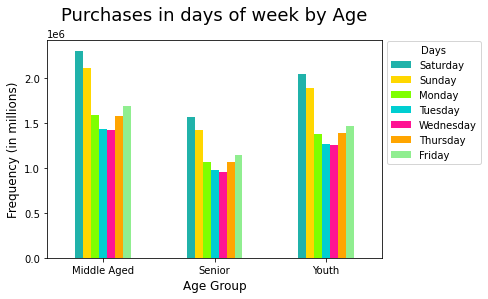

In [32]:
# Visualization of crosstab_age_day

bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'chartreuse', 'darkturquoise', 'deeppink','orange', 'lightgreen'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases in days of week by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

In [33]:
# Export
bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','dow_by_age_groups_barchart.png'), bbox_inches = 'tight')

Across all 3 Age Groups of Seniors, Middle-Aged & Youth

Busiest Day = Saturday

Slowest Day = Wednesday

Segmenetation based on Instacarts'customers number of dependents & relationship

In [34]:
# Exploring 'number_of_dependents'

cstmrs['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

Min = 0  Max = 3 dependents per family

Grouping families by size

Small = 0

Mid Sized = 1-2

Large = 3

In [35]:
# Creating family_size column 

cstmrs.loc[cstmrs['n_dependants'] == 0, 'family_size'] = 'Small'
cstmrs.loc[(cstmrs['n_dependants'] == 1) | (cstmrs['n_dependants'] == 2), 'family_size'] = 'Mid sized'
cstmrs.loc[cstmrs['n_dependants'] > 2, 'family_size'] = 'Large'

In [36]:
cstmrs['family_size'].value_counts(dropna = False)

Mid sized    15452367
Large         7772516
Small         7739681
Name: family_size, dtype: int64

In [37]:
#Exploring the connection of 'marital_status' and 'no_of_dependents'

family_crosstab = pd.crosstab(cstmrs['fam_status'],cstmrs['n_dependants'],dropna = False)

In [38]:
family_crosstab

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [39]:
cstmrs.loc[(cstmrs['fam_status'] == 'married') & (cstmrs['n_dependants'] == 1), 'household'] = 'Couple Without Children'
cstmrs.loc[(cstmrs['fam_status'] == 'married') & (cstmrs['n_dependants'] >= 2), 'household'] = 'Couple With Children'
cstmrs.loc[(cstmrs['fam_status'] == 'divorced/widowed') | (cstmrs['fam_status'] == 'single'), 'household'] = 'One Person'
cstmrs.loc[(cstmrs['fam_status'] == 'divorced/widowed') & (cstmrs['n_dependants'] > 0 ), 'household'] = 'Single Parent'
cstmrs.loc[cstmrs['fam_status'] == 'living with parents and siblings', 'household'] = 'Other Family'

In [40]:
# Checking new column (household)

cstmrs['household'].value_counts(dropna = False)

Couple With Children       14532650
One Person                  7739681
Couple Without Children     7211061
Other Family                1481172
Name: household, dtype: int64

In [41]:
# Confirming added column

cstmrs.shape

(30964564, 34)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple With Children'),
  Text(1, 0, 'One Person'),
  Text(2, 0, 'Couple Without Children'),
  Text(3, 0, 'Other Family')])

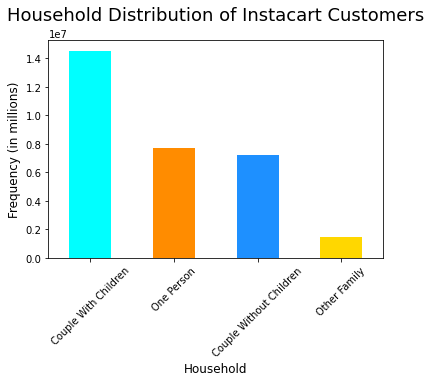

In [42]:
bar_household = cstmrs['household'].value_counts().plot.bar(color= ['aqua', 'darkorange', 'dodgerblue', 'gold'])
plt.title('Household Distribution of Instacart Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

In [43]:
# Saving the bar chart
bar_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_houshold_stats_barchart.png'),bbox_inches = 'tight')

Instacart Customer Income

In [44]:
# Exploring to categorize the income column

cstmrs['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

Lowest Income = 25,900 Highest Income = 593,900

Grouping Customers by income

Low = <70,000

Middle-class = 70,000-100,000

Upper-middle-class = 100,000-130,000

High = >130,000


In [45]:
# Creating income_category column

cstmrs.loc[cstmrs['income']< 70000, 'income_category'] = 'Low'
cstmrs.loc[(cstmrs['income']>= 70000) & (cstmrs['income']< 100000), 'income_category'] = 'Middle-class'
cstmrs.loc[(cstmrs['income']>= 100000) & (cstmrs['income']< 130000), 'income_category'] = 'Upper-mid-class'
cstmrs.loc[cstmrs['income']>= 130000, 'income_category'] = 'High'

In [46]:
# Checking income_category values

cstmrs['income_category'].value_counts(dropna = False)

Low                8520533
Middle-class       8236629
High               7401414
Upper-mid-class    6805988
Name: income_category, dtype: int64

In [47]:
# Confirming the added column

cstmrs.shape

(30964564, 35)

In [48]:
sns.color_palette('hls',8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [49]:
sns.color_palette('terrain')

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

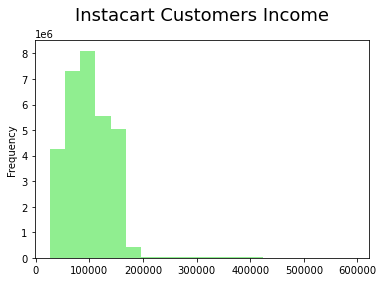

In [50]:
# Create an income histogram
plt.title('Instacart Customers Income', fontsize = 18, pad=20)
hist_inc = cstmrs['income'].plot.hist(bins = 20, color = 'lightgreen')

In [51]:
# Save histogram
hist_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram.png'))

Segmentation by Department

In [52]:
df_depts

,Unnamed: 0,department
0,2,other
1,3,bakery
2,4,produce
3,5,alcohol
4,6,international
5,7,beverages
6,8,pets
7,9,dry goods pasta
8,10,bulk
9,11,personal care


In [53]:
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [54]:
# Create dictionary 
dprt_map = dict(zip(df_depts["department_id"], df_depts["department"]))

In [55]:
dprt_map

{2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [56]:
cstmrs['department'] = cstmrs['department_id'].map(dprt_map)

In [57]:
cstmrs.shape

(30964564, 36)

In [58]:
# Distribution of 'department' values in 'cstmrs' dataframe

cstmrs['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
NaN                2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Behavioral Market Segmentation

In [59]:
# Creating alcohol_drinker column

cstmrs.loc[cstmrs['department'] !='alcohol', 'alcohol_drinker'] = 'No'
cstmrs.loc[cstmrs['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [60]:
cstmrs['alcohol_drinker'].value_counts(dropna = False)

No     30819937
Yes      144627
Name: alcohol_drinker, dtype: int64

In [61]:
cstmrs.shape

(30964564, 37)

Families with Babies

In [62]:
# Creating Has_babies column

cstmrs.loc[cstmrs['department'] == 'babies','Has_babies'] = 'Yes'
cstmrs.loc[cstmrs['department'] != 'babies','Has_babies'] = 'No'

In [63]:
cstmrs['Has_babies'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: Has_babies, dtype: int64

In [64]:
cstmrs.shape

(30964564, 38)

In [65]:
# Stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (cstmrs['region'],cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


In [66]:
ct_bybs = pd.crosstab(cstmrs['region'], cstmrs['Has_babies'], dropna = False)

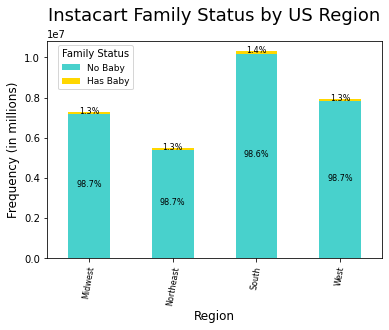

In [67]:
bar_bybs = ct_bybs.plot(kind = 'bar', stacked = True, color= ['mediumturquoise', 'gold'])
bar_bybs.legend(title='Family Status', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['No Baby', 'Has Baby'], fontsize = 9)
plt.title('Instacart Family Status by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Annotating the stacked bar chart

# Get the total for each row
total = ct_bybs.sum(axis=1)

# Calculate the percent for each row
per = ct_bybs.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_bybs.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_bybs.bar_label(c, labels=labels, label_type='center', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  


In [68]:
# Export
bar_bybs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','baby_fams_regional_barchart.png'), bbox_inches = 'tight')

< 2% of Instacart families have babies

Alcohol Drinkers

In [69]:
# Create a profile for customers that drink alcohol
cstmrs.loc[cstmrs['department_id'] ==5, 'profile'] = 'Alcohol Drinkers'

Meat-eating Customers

In [70]:
# Create a profile for customers that eat meat 
cstmrs.loc[cstmrs['department_id'] ==11, 'profile'] = 'Meat Eaters'

Snack Eaters

In [71]:
# Create a profile for customers that buy snacks
cstmrs.loc[cstmrs['department_id'] ==19, 'profile'] = 'Snackers'

Has babies

In [72]:
# Create a profile for customers with babies
cstmrs.loc[(cstmrs['n_dependants'] > 0) & (cstmrs['department_id'] == 18), 'profile'] = 'Has Babies'

Income of Families

In [73]:
# Create a profile for high income families 
cstmrs.loc[(cstmrs['n_dependants'] > 1) & (cstmrs['income'] > 128102), 'profile'] = 'High-Income Family'

In [74]:
# Create a profile for average income families
cstmrs.loc[(cstmrs['n_dependants'] > 1) & (cstmrs['income'] >67292) & (cstmrs['income'] < 128102), 'profile'] = 'Average-Income Family'

In [75]:
# Create a profile for low income families
cstmrs.loc[(cstmrs['n_dependants'] > 1) & (cstmrs['income'] < 67292), 'profile'] = 'Low-Income Family'

In [76]:
# Create a profile for high income single adults without children
cstmrs.loc[(cstmrs['fam_status'] == 'single') & (cstmrs ['n_dependants'] == 0) & (cstmrs['income'] > 128102) , 'profile'] = 'Rich Single Adult'

Income of Retired

In [77]:
# Create a profile for rich retired 
cstmrs.loc[(cstmrs['income'] > 128102) & (cstmrs['Age'] > 65),'profile'] ='Rich Retired'

In [78]:
# Create a profile for average retired 
cstmrs.loc[(cstmrs['income'] > 67292) & (cstmrs['income'] < 128102) & (cstmrs['Age'] < 65), 'profile'] = 'Average Retired'

In [79]:
# Create a profile for poor retired
cstmrs.loc[(cstmrs['income'] < 67292) & (cstmrs['Age'] > 65),'profile'] ='Poor Retired'

Pet Owners

In [80]:
# Create a profile for pet owners
cstmrs.loc[cstmrs['department_id'] ==8, 'profile'] = 'Pet Owners'

In [81]:
# Fill NaN as "Other"
cstmrs['profile'] = cstmrs['profile'].fillna('Other')

In [82]:
cstmrs['profile'].value_counts(dropna = False)

Average Retired          11443704
Other                     5961766
Low-Income Family         3378392
Rich Retired              2946712
High-Income Family        2368980
Average-Income Family     2011746
Poor Retired               993651
Rich Single Adult          929337
Snackers                   664874
Meat Eaters                 93384
Pet Owners                  93060
Has Babies                  47151
Alcohol Drinkers            31807
Name: profile, dtype: int64

In [83]:
sns.color_palette('icefire', 13)

[(0.54052516, 0.76927562, 0.81491462),
 (0.33355526, 0.64107876, 0.80445484),
 (0.21372783, 0.49630865, 0.81589566),
 (0.28708711, 0.32912157, 0.69034504),
 (0.23967922, 0.23067729, 0.4260591),
 (0.15652427, 0.15348248, 0.22238175),
 (0.12284806, 0.1179729, 0.11772022),
 (0.22994394, 0.13076731, 0.15146314),
 (0.40444332, 0.16588767, 0.22434027),
 (0.61319563, 0.1824336, 0.2687872),
 (0.80630444, 0.26198807, 0.22040877),
 (0.91463791, 0.43668557, 0.21367954),
 (0.9615041, 0.6375203, 0.41474106)]

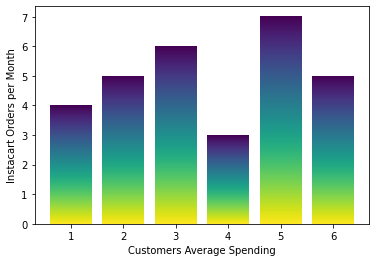

In [86]:
fig, ax = plt.subplots()

bar = ax.bar([1,2,3,4,5,6],[4,5,6,3,7,5])

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0)
    ax.axis(lim)
    
    plt.ylabel ('Instacart Orders per Month')
    plt.xlabel ('Customers Average Spending')
gradientbars(bar)

plt.show() 

In [89]:
bar = pd.DataFrame({'Instacart Customers in Millions':[1,2,3,4,5], 'Customer Profiles':[10,5,2,4,5]})

Text(0.5, 0, 'Customer Profiles')

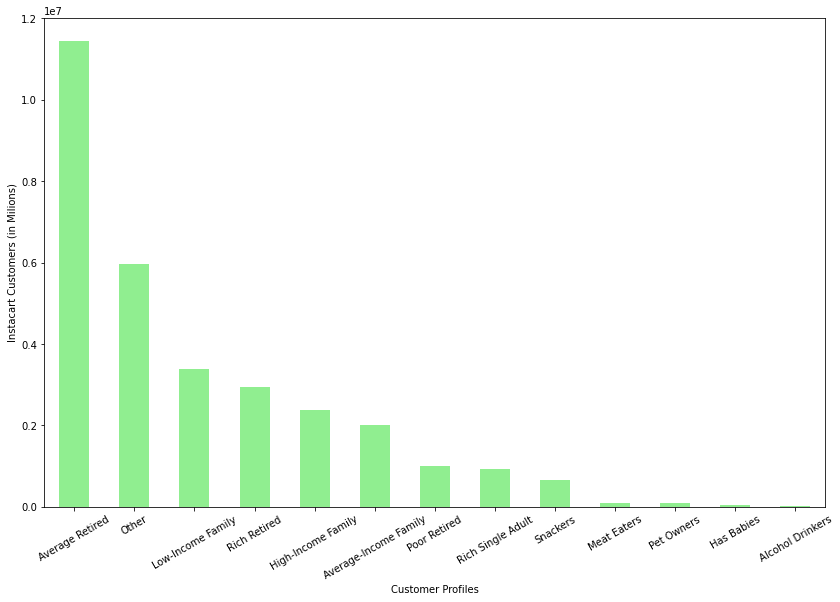

In [90]:
# Creating a barchart with the new profiles
bar = cstmrs['profile'].value_counts().plot.bar(rot=30, figsize = (14,9), color = 'lightgreen')
plt.ylabel ('Instacart Customers (in Milions)')
plt.xlabel ('Customer Profiles')

In [91]:
# Saving the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_profiles_barchart.png'),bbox_inches = 'tight')

Pet Owner Customers

In [92]:
# Creating pet_owner column

cstmrs.loc[cstmrs['department'] == 'pets', 'pet_owner'] = 'Yes'
cstmrs.loc[cstmrs['department'] != 'pets', 'pet_owner'] = 'No'

In [93]:
cstmrs.shape

(30964564, 40)

In [94]:
cstmrs['pet_owner'].value_counts(dropna= False)

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

Vegetarians 

In [95]:
# Create list to assign 'vegetarian' column's values. If a customer never purchased 'meat seafood' or deli, then we assume them a vegetarian.
result = []
for value in cstmrs['department_id']:
    # 12 means 'meat seafood', 20 is the department_id of 'deli'
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')
result

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',


In [96]:
# Assigning 'result' list values to 'vegetarian' column

cstmrs['vegetarian'] = result

In [97]:
cstmrs.shape

(30964564, 41)

In [98]:
cstmrs['vegetarian'].value_counts(dropna = False)

Yes    29285949
No      1678615
Name: vegetarian, dtype: int64

Text(0.5, 1.0, 'Vegetarian & Non-Vegetarian Customers')

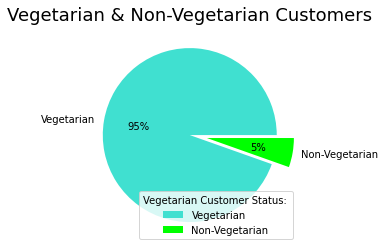

In [99]:
# Drawing a pie chart of Vegetarians

veg_pie = cstmrs['vegetarian'].value_counts().plot.pie(labels = ['Vegetarian','Non-Vegetarian'], autopct=('%1.f%%'), colors = ['turquoise','lime'], label = '', explode = [0,0.2])
veg_pie.legend(title = 'Vegetarian Customer Status: ', loc = 'lower right')
plt.title( "Vegetarian & Non-Vegetarian Customers", fontsize= '18')

In [100]:
# Exporting Vegetarian pie chart in .png format

veg_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veg_pie'), bbox_inches='tight')

Early Birds V Night Owls

In [101]:
# Exploring the distribution of orders in 24 hours a day

cstmrs['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [102]:
# Create 'period_of_day' column based on order time

cstmrs.loc[cstmrs['order_hour_of_day'] <5 , 'order_time_habit'] = 'Night Owl'
cstmrs.loc[(cstmrs['order_hour_of_day']>= 9) & (cstmrs['order_hour_of_day']<= 23), 'order_time_habit'] = 'Regular'
cstmrs.loc[(cstmrs['order_hour_of_day']>= 5) & (cstmrs['order_hour_of_day']< 9), 'order_time_habit'] = 'Early Bird'

In [103]:
cstmrs['order_time_habit'].value_counts(dropna = False)

Regular       27593897
Early Bird     2887754
Night Owl       482913
Name: order_time_habit, dtype: int64

Text(0.5, 0, 'Time of Order Habits')

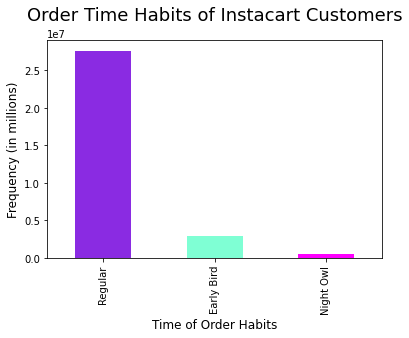

In [104]:
# Draw a bar chart of 'order_time_habit' column

time_habit_bar = cstmrs['order_time_habit'].value_counts().plot.bar( color = ['blueviolet', 'aquamarine', 'magenta'])
plt.title('Order Time Habits of Instacart Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Time of Order Habits',  fontsize = 12)

In [105]:
# Saving the bar chart
time_habit_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_order_habits_barchart.png'),bbox_inches = 'tight')

Aggregate the Max, Min & Mean Values

In [106]:
# Comparing the Max, Min & Mean Values
cstmrs.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                days_since_prior_order           
                         max  min      mean                   mean  min   max
profile                                                                      
Alcohol Drinkers        15.0  1.0  8.032672              10.356580  0.0  30.0
Average Retired         25.0  1.0  7.955560              10.755851  0.0  30.0
Average-Income Family   25.0  1.0  7.946640              10.739723  0.0  30.0
Has Babies              15.0  1.0  7.633590              10.131648  0.0  30.0
High-Income Family      25.0  1.0  7.953846              10.810976  0.0  30.0
Low-Income Family       25.0  1.0  7.381677              10.927941  0.0  30.0
Meat Eaters             15.0  1.0  7.959153              11.404019  0.0  30.0
Other                   25.0  1.0  8.052920              10.880050  0.0  30.0
Pet Owners              15.0  1.0  7.887489              11.593531  0.0  30.0
Poor Retired            25.0  1.0  6.704679              11.096586  0.0  30.0
Rich Retired            25.0  1.0  7.958318              10.718950  0.0  30.0
Rich Single Adult       25.0  1.0  7.932368              10.675896  0.0  30.0
Snackers                 7.0  1.6  4.265089              10.781580  0.0  30.0

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [107]:
# Comparing customer profiles & regions
crosstab3 = pd.crosstab(cstmrs['profile'], cstmrs['region'], dropna = False)

In [108]:
crosstab3

region,Midwest,Northeast,South,West
profile,,,,
Alcohol Drinkers,7491,5706,10691,7919
Average Retired,2678831,2001315,3833308,2930250
Average-Income Family,461452,360607,662387,527300
Has Babies,11877,8422,14914,11938
High-Income Family,569004,427743,771098,601135
Low-Income Family,789769,588581,1125831,874211
Meat Eaters,22422,16932,31331,22699
Other,1408054,1059765,1993645,1500302
Pet Owners,21358,17734,29909,24059


In [109]:
# Comparing customer profiles & departments
crosstab4 = pd.crosstab(cstmrs['profile'], cstmrs['department_id'], dropna = False)

In [110]:
crosstab4

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Alcohol Drinkers,0,0,0,0,31807,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Average Retired,791721,12798,419265,3457991,50857,98563,898471,0,317424,12187,...,268486,671607,238970,387558,1954402,251694,166158,890557,373256,24194
Average-Income Family,139432,2125,73254,609739,8147,17146,156010,0,56657,2221,...,48290,119920,40325,69119,341188,44574,27480,159736,65629,4261
Has Babies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47151,0,0,0
High-Income Family,165423,2768,90778,702406,12620,20440,188021,0,66239,2236,...,57035,141109,49432,82370,403200,54345,33065,182363,77655,4878
Low-Income Family,227591,3618,117232,939268,15680,25286,315883,0,80635,4317,...,59368,183416,80474,99411,539597,79627,38446,405251,109324,7062
Meat Eaters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other,462664,7694,244788,1964571,0,56164,586406,0,176097,7323,...,139713,388979,153273,217528,1130293,153788,36502,0,221764,14219
Pet Owners,0,0,0,0,0,0,0,93060,0,0,...,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x7fe73b38ad30>,
 [Text(0, 0, 'Snackers'),
  Text(1, 0, 'Rich Single Adult'),
  Text(2, 0, 'High-Income Family'),
  Text(3, 0, 'Average-Income Family'),
  Text(4, 0, 'Low-Income Family'),
  Text(5, 0, 'Rich Retired'),
  Text(6, 0, 'Average Retired'),
  Text(7, 0, 'Poor Retired'),
  Text(8, 0, 'Has Babies'),
  Text(9, 0, 'Meat Eaters'),
  Text(10, 0, 'other')])

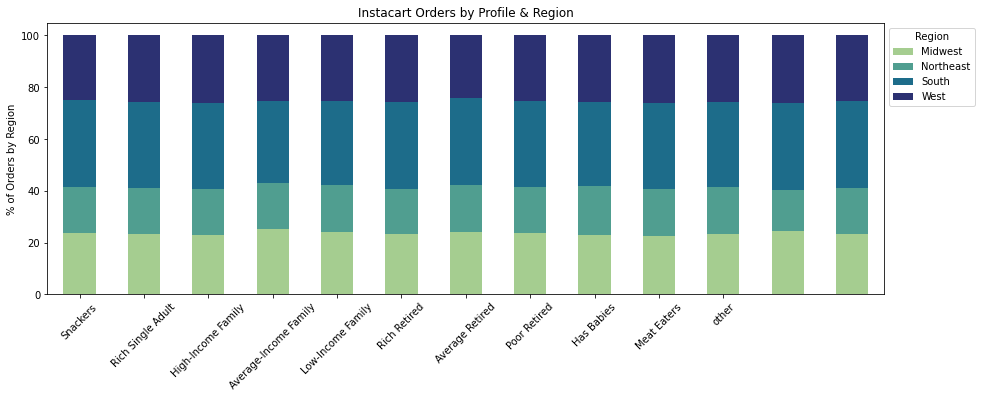

In [117]:
# Creating a stacked barchart of customer profile by region
bar_region_prof = crosstab3.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap = 'crest').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('% of Orders by Region')
plt.title ('Instacart Orders by Profile & Region')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['Snackers','Rich Single Adult','High-Income Family','Average-Income Family','Low-Income Family','Rich Retired','Average Retired','Poor Retired','Has Babies','Meat Eaters','other'])

Highest % of orders by region is in The South

Marketing team should focus on advertising to their clients in the Northeast

In [118]:
# Export
bar_region_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')

Text(0.5, 0, 'Region')

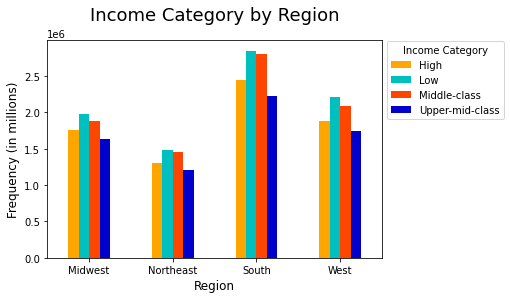

In [115]:
# Drawing a bar chart of income by US regions

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['orange', 'c', 'orangered', 'mediumblue'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [116]:
# Export
bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_by_region_barchart.png'), bbox_inches = 'tight')

Low-Income users make up the Majority of Instacart customers by Region


In [133]:
# Drawing a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (cstmrs['region'],cstmrs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


Text(0.5, 0, 'Region')

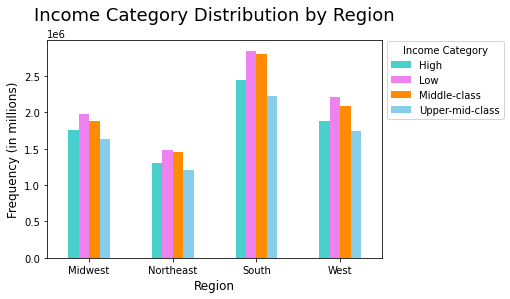

In [134]:
# Drawing a bar chart of income categorie in the US regions

bar_incm_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['mediumturquoise', 'violet', 'darkorange', 'skyblue'])
# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_incm_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category Distribution by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [135]:
# Exporting income (in the US regions) bar chart in .png format

bar_incm_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_incm_reg.png'), bbox_inches='tight')

In [136]:

crosstab_age_day = pd.crosstab(cstmrs['age_category'], cstmrs['order_dow'], dropna = False)

Text(0.5, 0, 'Age Category')

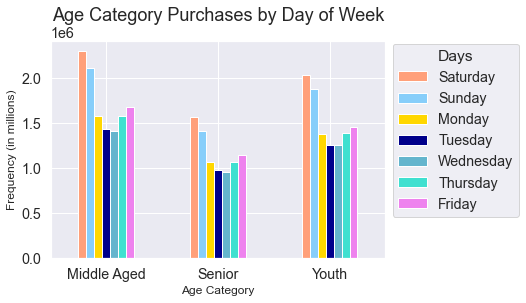

In [223]:
bar_age_dow = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['lightsalmon', 'lightskyblue', 'gold', 'darkblue', 'c','turquoise', 'violet'])
bar_age_dow.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Age Category Purchases by Day of Week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

In [224]:
bar_age_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_dow.png'), bbox_inches='tight')

In [225]:
# Creating order_time_habit and region connection

ct_habit = pd.crosstab(cstmrs['region'], cstmrs['order_time_habit'], dropna = False)
ct_habit

order_time_habit,Early Bird,Night Owl,Regular
region,,,
Midwest,670594,113520,6477399
Northeast,511923,86857,4865905
South,973296,159939,9177904
West,731941,122597,7072689


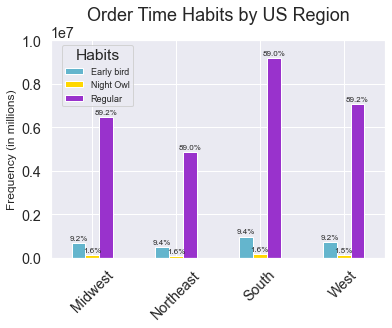

In [226]:
# Plotting stacked bar

bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['c', 'gold','darkorchid'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)

In [227]:
bar_hbt_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Instacart Shopping Time of Day by Type of Shopper')

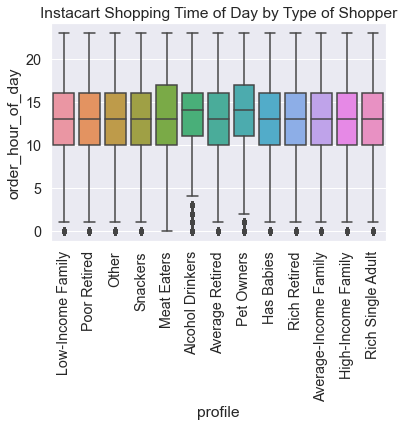

In [228]:
sns.set(font_scale=1.3)
boxplot_profile_time = sns.boxplot(x='profile',
                y='order_hour_of_day',
                data=cstmrs)
plt.xticks(rotation=90)
plt.title ('Instacart Shopping Time of Day by Type of Shopper')

In [230]:
boxplot_profile_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_profile_time.png'), bbox_inches='tight')

In [231]:
# Create crosstab by region with loyalty flag
crosstabz2 = pd.crosstab(df_merged_all['region'], df_merged_all['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'Loyal Customers by Region')

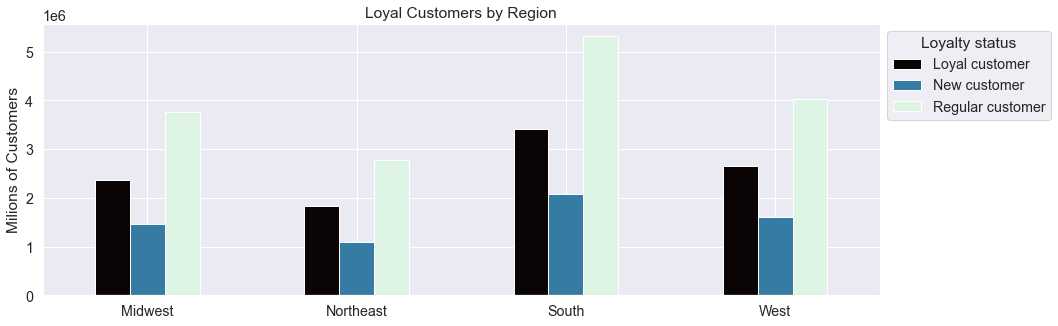

In [232]:
# Create barchart from crosstab
bar_loyalty_region = crosstabz2.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='mako').legend(title='Loyalty status', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Milions of Customers')
plt.title ('Loyal Customers by Region')

In [233]:
#exporting the figure
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_region_barchart.png'))

In [234]:
high_activity_cxs.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,family_size,household,income_category,department,alcohol_drinker,Has_babies,profile,pet_owner,vegetarian,order_time_habit
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Large,Couple With Children,Low,beverages,No,No,Low-Income Family,No,Yes,Early Bird
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Large,Couple With Children,Low,beverages,No,No,Low-Income Family,No,Yes,Early Bird
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Large,Couple With Children,Low,beverages,No,No,Low-Income Family,No,Yes,Regular
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Large,Couple With Children,Low,beverages,No,No,Low-Income Family,No,Yes,Early Bird
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Large,Couple With Children,Low,beverages,No,No,Low-Income Family,No,Yes,Regular


In [255]:
# creating a crosstab of region and spending-flag
crosstab6 = pd.crosstab(cstmrs['region'], cstmrs['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Spending by Region')

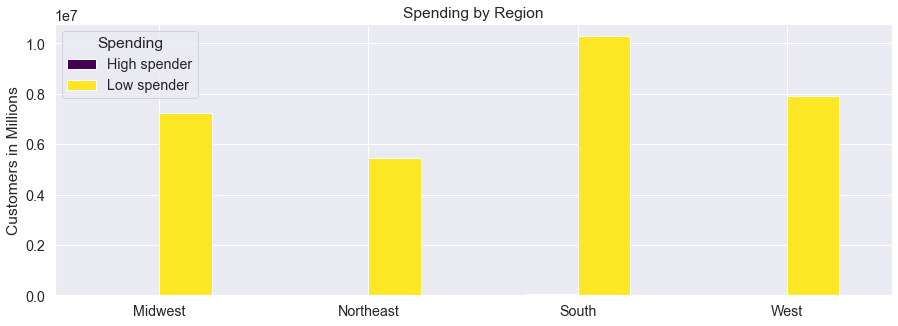

In [256]:
# creating a barchart from the crosstab
bar_spending_region = crosstab6.plot.bar(rot=0, figsize=(15,5), colormap='viridis').legend(title='Spending')
plt.xlabel('')
plt.ylabel('Customers in Millions')
plt.title ('Spending by Region')

In [237]:
bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','spending_region_barchart.png'))

In [238]:
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', '/Users/bridget/Downloads/Instacart Basket Analysis 11-2022/02 Data/Prepared Data/orders_products_merged.pkl'))

In [239]:
df = df_ords_prods_merged[:1000000]

In [240]:
def price_label(row):
    
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High range'
    else: return 'Not enough data'

In [241]:
df['price_range'] = df.apply(price_label, axis=1)

In [242]:
df['price_range'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [243]:
df['prices'].max()

14.8

In [244]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [245]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [246]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [247]:
df_ords_prods_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [252]:
df_ords_prods_merged['prices'].head()

0    9.0
1    9.0
2    9.0
3    9.0
4    9.0
Name: prices, dtype: float64

In [248]:
df_ords_prods_merged['order_dow'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_dow, dtype: int64

Text(0.5, 1.0, 'Instacart Products Price Range')

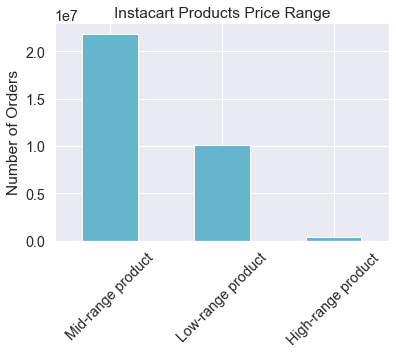

In [249]:
#creating a barchart with the price range of the products
bar_price_range =df_ords_prods_merged['price_range_loc'].value_counts().plot.bar(rot = 45, color = 'c')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Instacart Products Price Range')

In [250]:
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_price_range_barchart.png'))

In [257]:
crosstab7 = pd.crosstab(df_ords_prods_merged['department_id'], df_ords_prods_merged['price_range_loc'], dropna = False)

In [258]:
crosstab7

price_range_loc,High-range product,Low-range product,Mid-range product
department_id,,,
1,0,681412,1553331
2,0,15972,20319
3,0,287938,884490
4,0,2697883,6781408
5,0,35243,118453
6,0,76974,192279
7,0,852974,1835149
8,0,29551,68165
9,0,299327,567300


Text(0.5, 1.0, 'Orders by Department & Price Range')

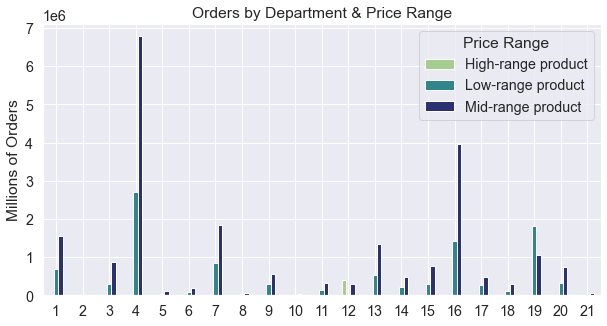

In [260]:
# Creating a chart crossing price range with department id 
bar_department_price_range = crosstab7.plot.bar(rot=0, figsize=(10,5), colormap='crest').legend(title='Price Range')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Price Range')

In [261]:
bar_department_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_price_range.png'), bbox_inches = 'tight')

In [265]:
crosstab8 = pd.crosstab(cstmrs['department_id'], cstmrs['loyalty_flag'], dropna = False)

Text(0.5, 1.0, 'Orders by Department & Loyalty Status')

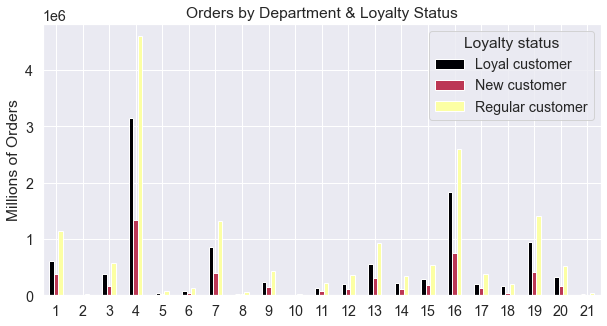

In [267]:
bar_department_loyalty = crosstab8.plot.bar(rot=0, figsize=(10,5), colormap='inferno').legend(title='Loyalty status')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Loyalty Status')

In [268]:
bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_loyalty.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Product Prices')

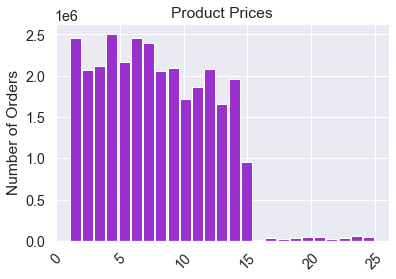

In [271]:
# Creating a histogram with product prices
hist_price_frequency =cstmrs['prices'].plot.hist(bins = 25,rot = 45, color = 'darkorchid', rwidth = 0.9)
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Product Prices')

In [272]:
hist_price_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','hist_prices.png'))

In [273]:
#creating a crosstab tho cross loyalty status and regularity of orders
crosstaby = pd.crosstab(df_merged_all['days_since_prior_order'], df_merged_all['loyalty_flag'], dropna = False)

In [274]:
crosstaby

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,50835,157845
1.0,626159,52138,262177
2.0,973214,73018,417492
3.0,1185968,102510,587710
4.0,1202971,128621,747056
5.0,1074717,163020,886697
6.0,1090986,230094,1196418
7.0,1351314,349823,1775061
8.0,643383,223448,1065114


Text(0.5, 1.0, 'Loyal Customers by Region')

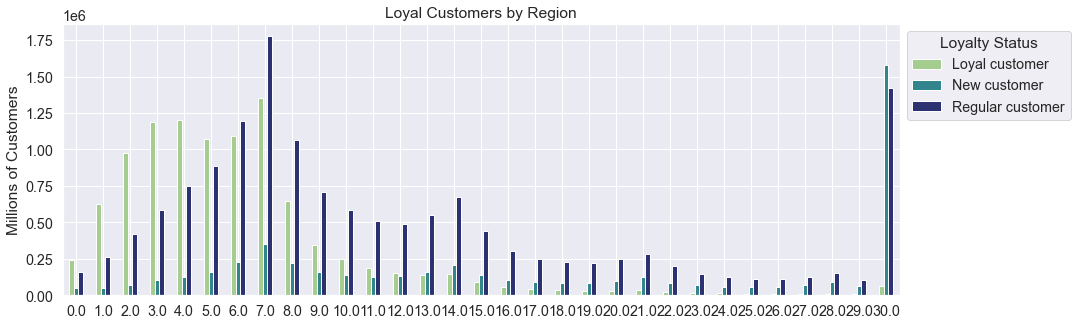

In [275]:
# creating a barchart from the crosstab
bar_loyalty_region = crosstaby.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='crest').legend(title='Loyalty Status', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Millions of Customers')
plt.title ('Loyal Customers by Region')

In [276]:
#saving the figure
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','stacked_loyalty_region.png'),bbox_inches = 'tight')

In [174]:
# Department category expenditure aggregation

cstmrs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.335677  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

In [175]:
# Age category usage frequency aggregation

cstmrs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
age_category                           
Middle Aged           8.354216   1  145
Senior                8.307779   1   99
Youth                 8.415515   1  109

In [176]:
# Region expenditure aggregation

cstmrs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792303  1.0  25.0
Northeast  7.781411  1.0  25.0
South      7.794407  1.0  25.0
West       7.790267  1.0  25.0

In [177]:
# Region usage frequency aggregation

cstmrs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                       mean min  max
region                              
Midwest            8.353883   1  109
Northeast          8.376380   1  145
South              8.365296   1  137
West               8.359292   1  114

In [178]:
# Household usage frequency aggregation

cstmrs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                                     mean min  max
household                                         
Couple With Children             8.370658   1  145
Couple Without Children          8.373970   1  114
One Person                       8.336567   1  137
Other Family                     8.373383   1  102

In [179]:
# Income category expenditure aggregation

cstmrs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
High             7.949565  1.0  25.0
Low              7.358224  1.0  25.0
Middle-class     7.957049  1.0  25.0
Upper-mid-class  7.957407  1.0  25.0

In [180]:
# Income category usage frequency aggregation

cstmrs.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
income_category                           
High                     8.480898   1  121
Low                      7.965765   1  137
Middle-class             8.528310   1  114
Upper-mid-class          8.532210   1  145

In [181]:
# Order-time habit with usage frequency aggregation

cstmrs.groupby('order_time_habit').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
order_time_habit                           
Early Bird                8.541485   1   93
Night Owl                 8.614131   1  109
Regular                   8.339969   1  145

In [182]:
# Order-time habit with expenditure aggregation

cstmrs.groupby('order_time_habit').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
order_time_habit                     
Early Bird        7.803469  1.0  25.0
Night Owl         7.814603  1.0  25.0
Regular           7.788788  1.0  25.0

In [183]:
# Parents with babies in usage frequency aggregation

cstmrs.groupby('Has_babies').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                        mean min  max
Has_babies                           
No                  8.333289   1  145
Yes                10.577894   1   92

In [184]:
# Parents with babies in expenditure aggregation

cstmrs.groupby('Has_babies').agg({'prices' : ['mean', 'min', 'max']})

prices           
                mean  min   max
Has_babies                     
No          7.792657  1.0  25.0
Yes         7.634399  1.0  15.0

In [185]:
# Vegetarians and meat lovers in usage frequency aggregation

cstmrs.groupby('vegetarian').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                        mean min  max
vegetarian                           
No                  8.643732   1  142
Yes                 8.346950   1  145

In [186]:
# Vegetarians and meat lovers in expenditure aggregation

cstmrs.groupby('vegetarian').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
vegetarian                      
No          11.206942  1.0  25.0
Yes          7.594739  1.0  20.0

In [187]:
crosstab_vegetarian = pd.crosstab(cstmrs['region'], cstmrs['vegetarian'], dropna = False)
crosstab_vegetarian

vegetarian,No,Yes
region,,
Midwest,392724,6868789
Northeast,296969,5167716
South,557740,9753399
West,431182,7496045


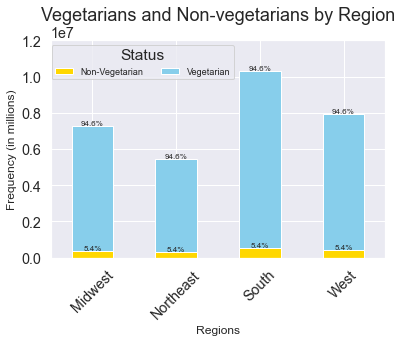

In [191]:
# Plotting the stacked bar

bar_region_veg = crosstab_vegetarian.plot(kind = 'bar', stacked = True, color =['gold', 'skyblue'])
bar_region_veg.legend(title='Status', bbox_to_anchor=(0.56, 1.0), loc='upper right', ncol = 2, labels=['Non-Vegetarian', 'Vegetarian'], fontsize = 9)
plt.title('Vegetarians and Non-vegetarians by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the stacked bar chart

# Get the total for each row
total = crosstab_vegetarian.sum(axis=1)

# Calculate the percent for each row
per = crosstab_vegetarian.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_region_veg.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c, per[(label)])]
    
    # Add the annotation
    bar_region_veg.bar_label(c, labels=labels, label_type='edge', fontsize = 8)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 12000000)


In [192]:
# Exporting vegetarians (in the US regions) bar chart in .png format

bar_region_veg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_veg.png'), bbox_inches='tight')

In [193]:
# Creating order_time_habit and region connection

ct_habit = pd.crosstab(cstmrs['region'], cstmrs['order_time_habit'], dropna = False)
ct_habit

order_time_habit,Early Bird,Night Owl,Regular
region,,,
Midwest,670594,113520,6477399
Northeast,511923,86857,4865905
South,973296,159939,9177904
West,731941,122597,7072689


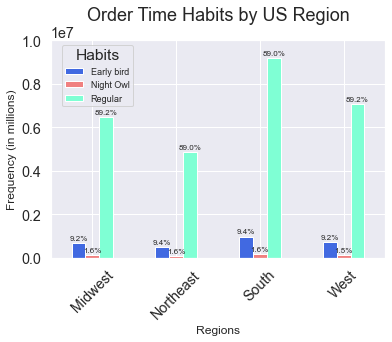

In [215]:
# Plotting the stacked bar

bar_hbt_rgn = ct_habit.plot(kind = 'bar', stacked = False, color =['royalblue', 'lightcoral','aquamarine'])
bar_hbt_rgn.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits by US Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

# Get the total for each row
total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_rgn.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
    # Add the annotation
    bar_hbt_rgn.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)


In [216]:
# Exporting order_time_habits (in the US regions) bar chart in .png format

bar_hbt_rgn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_rgn.png'), bbox_inches='tight')

In [217]:
ct_hbt_dept = pd.crosstab(cstmrs['department'], cstmrs['order_time_habit'], dropna = False)
ct_hbt_dept

order_time_habit,Early Bird,Night Owl,Regular
department,,,
alcohol,7972,1356,135299
babies,50188,5009,355195
bakery,107807,16374,996647
beverages,231045,41112,2299744
breakfast,68714,9734,592402
bulk,3057,506,29888
canned goods,88259,16065,907750
dairy eggs,515309,75559,4586314
deli,88984,15308,899542


(-1.0, 22.0)

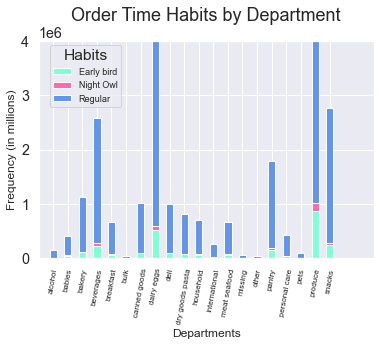

In [218]:
# Plotting the stacked bar

bar_hbt_dept = ct_hbt_dept.plot(kind = 'bar', stacked = True, color =['aquamarine','hotpink','cornflowerblue'])
bar_hbt_dept.legend(title='Habits', bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Order Time Habits by Department', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Set the y axis limit to increase the axis length
plt.ylim(0, 4000000)
plt.xlim(-1, 22)

In [219]:
bar_hbt_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hbt_dept.png'), bbox_inches='tight')

In [220]:
# Export updated Dataframes & Charts

In [221]:
# Export low_activity_cxs in .pkl format 
low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

In [222]:
# Export high_activity_cxs in .pkl format
high_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cxs_orders.pkl'))

Export Charts

In [205]:
# Export dow_by_age_group
bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','dow_by_age_groups_barchart.png'), bbox_inches = 'tight')

In [206]:
# Export bar chart Household_status
bar_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_houshold_stats_barchart.png'),bbox_inches = 'tight')

In [207]:
# Export histogram income_frequency_of_use
hist_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram.png'))

In [208]:
# Export Families with vs without babies by region
bar_bybs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','baby_fams_regional_barchart.png'), bbox_inches = 'tight')

In [209]:
# Exporting Customer Profiles
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_profiles_barchart.png'),bbox_inches = 'tight')

In [210]:
# Exporting Vegetarian pie chart in .png format

veg_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veg_pie'), bbox_inches='tight')

In [211]:
# Export Ordering_habits
time_habit_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_order_habits_barchart.png'),bbox_inches = 'tight')


In [212]:
# Export income by regional spending
bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_by_region_barchart.png'), bbox_inches = 'tight')

In [213]:
# Export Customer profiles by region
bar_region_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')